# Imaging Processing with Python

_"A picture is worth a thousand words"_. Images tell stories, harboring abundant information that can be useful in many ways. We extract and analyze such information through imaging processing, and Python is one of the popular computer languages for this purpose. An image is essentialy an array, or specifically numpy array in Python. 

In [1]:
myfg_file = 'Data/soccer.jpg'
mybg_file = 'Data/footprint.jpg'

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

def add_note(img):
  """ add a note of basic info to image: dtype, max
  """
  if isinstance(img, np.ndarray):
    print (f'-- The object type is {type(img)}, \ndata type is {img.dtype}, and the max is {np.max(img)}')
  else:
    print (f'-- The object type is {type(img)} \nand the max value is {np.max(img)}')

def multiplot(imgs, titles=None, nrow=1, ncol=1, showtick=True, h=8, w=8):
  """ display multiple figures
  """
  fig, axes = plt.subplots(nrows=nrow, ncols=ncol, figsize=(w, h))

  if not titles or len(titles) < len(imgs):
    tiltes = range(len(imgs)) + 1

  cnt = 0

  for i in range(nrow):
    if cnt == len(imgs):
        break
    for j in range(ncol):
      if nrow==1:
        ax = axes[j]
      else:
        ax = axes[i, j]

      ax.imshow(imgs[cnt], cmap='gray')
      ax.set_title(titles[cnt])
      ax.axis(showtick)
      cnt += 1
      if cnt == len(imgs):
        break

  fig.tight_layout()  

  #fig.show()

## Read

There are multiple ways with different libraries to read an image file in Python.

Image format is assumed to be jpeg or png.

1. matplotlib

In fact, matplotlib relies on the Pillow library to load image data. It is not recommended to use anymore. Note that the values are float between 0-1 instead of integer 0-255.


-- The object type is <class 'numpy.ndarray'>, 
data type is uint8, and the max is 231


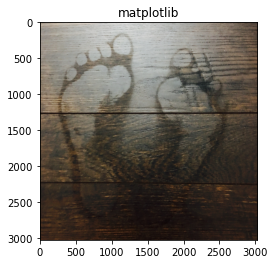

In [2]:
from matplotlib import pyplot as plt
from matplotlib import image as mp_img

myimg_mp = mp_img.imread(mybg_file)
add_note(myimg_mp)
plt.title("matplotlib")
plt.imshow(myimg_mp)
plt.show()

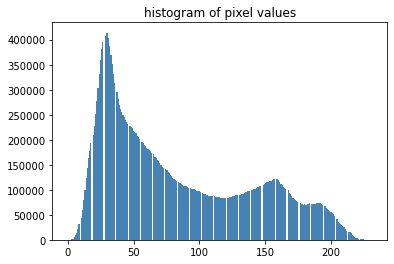

In [3]:
plt.hist(myimg_mp.flatten(), bins=256, color='steelblue')
plt.title('histogram of pixel values')
plt.show()

2. Pillow

This library provides basic image processing functionalities. It is imported as PIL standing for Python Imaging Library.

Note the object is not in numpy array format.

To read from url, use `Image.open(urllib.request.urlopen(url))`. Refer to [stackflow](https://stackoverflow.com/questions/21061814/how-can-i-read-an-image-from-an-internet-url-in-python-cv2-scikit-image-and-mah) for reading url images using different libraries.

-- The object type is <class 'PIL.JpegImagePlugin.JpegImageFile'> 
and the max value is 231


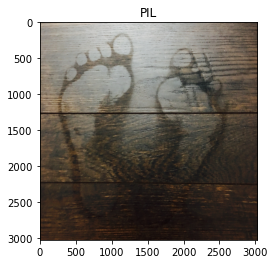

In [4]:
from PIL import Image
myimg_pil = Image.open(mybg_file)
add_note(myimg_pil)
plt.title('PIL')
plt.imshow(myimg_pil, cmap='gray')
plt.show()

3. OpenCV

OpenCV, or Open Source Computer Vision, is a widely used and powerful tool for computer vision and image processing. Originally developed by Intel, it is written in C++ on the backend.

It is imported as cv2 in python. Note that 1) the array dimensions are in BGR instead of the usual RGB. For more details, please see [OpenCV documentation](https://docs.opencv.org/3.4/d8/d01/group__imgproc__color__conversions.html); 2) if using cv2.imshow to display, the image will be in a separate window, but in colab, a special function cv2_show is needed to display. This function internally converts the BGR to RGB. To be simple, I just use matplotlib function imshow instead. 

-- The object type is <class 'numpy.ndarray'>, 
data type is uint8, and the max is 232


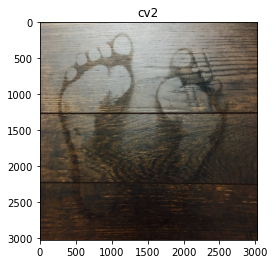

In [5]:
import cv2

as_gray = False
if as_gray:
  tag = 0 # or cv2.IMREAD_GRAYSCALE 
else:
  tag = 1 # or cv2.IMREAD_ANYCOLOR 

myimg_cv0 = cv2.imread(mybg_file, tag)
myimg_cv = cv2.cvtColor(myimg_cv0, cv2.COLOR_BGR2RGB)

add_note(myimg_cv)
 
plt.title('cv2')
plt.imshow(myimg_cv) 
plt.show()

4. skimage

skimage, or Scikit-Image, is a sub-module of Scikit-Learn. It is for machine learning on image preprocessing.

Note that, unlike with other libraries, if we read the image in gray scale, the default values will be in float between 0-1. The formats can be converted using functions *img_as_ubyte* (0-255) or *img_as_float* (0-1).

It is easy to read from url using skimage - treat the url as file name.

-- The object type is <class 'numpy.ndarray'>, 
data type is uint8, and the max is 231


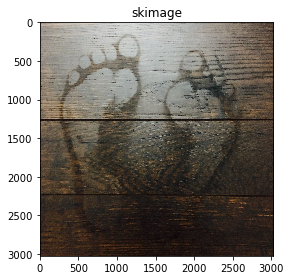

In [6]:
from skimage import io, color, img_as_float, img_as_ubyte
myimg_sk = io.imread(mybg_file, as_gray=False)
#color.rgba2rgb(myimg_sk)
add_note(myimg_sk)
plt.title('skimage')
io.imshow(myimg_sk)
plt.show()
#plt.imshow(myimg_sk) #smoother


5. Tensorflow

Image processing is an important application of deep learning. As a premier open-source deep learning framework, Tensorflow provides a powerful image module with various functions for image processing.


In [7]:
try:
    # tf might be not installed for many cases, so...
    # try google colab
    from tensorflow import io, image
    myimg_tf = io.read_file(mybg_file)
    myimg_tf = image.decode_png(myimg_tf, channels=3)
    add_note(myimg_tf)
    plt.title('tensorflow')
    plt.imshow(myimg_tf)
    plt.show()
except ModuleNotFoundError:
    print("'tensorflow' is not installed or not importable. Skip this...")


'tensorflow' is not installed or not importable. Skip this...


## Resize

Resizing an image basically is to resample pixels to scale down or up the amount of pixels. There are multiple ways to re-size an image, such as *rescale*, *resize*, and *downscale_local_mean*. Here I use *resize* on color image. More details can be found at [skimage documentation](https://scikit-image.org/docs/stable/auto_examples/transform/plot_rescale.html).

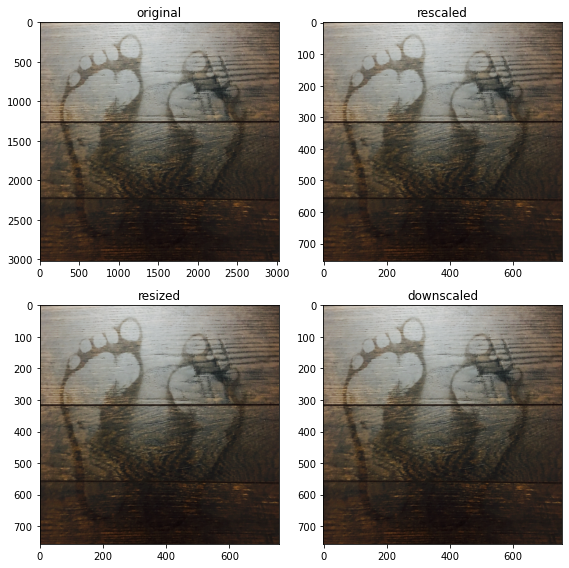

In [8]:
from skimage.transform import rescale, resize, downscale_local_mean
#from skimage.color import rgb2gray as r2g

# rescale
myimg_rescaled = rescale(myimg_sk, 0.25, multichannel=True, anti_aliasing=True)
#myimg_rescaled = rescale(myimg_sk, (0.5,0.5,1), anti_aliasing=True)

# resize
myr = resize(myimg_sk[:,:,0], (myimg_sk.shape[0] // 4,  myimg_sk.shape[1] // 4), anti_aliasing=True)
myg = resize(myimg_sk[:,:,1], (myimg_sk.shape[0] // 4,  myimg_sk.shape[1] // 4), anti_aliasing=True)
myb = resize(myimg_sk[:,:,2], (myimg_sk.shape[0] // 4,  myimg_sk.shape[1] // 4), anti_aliasing=True)

myimg_resized = np.dstack([myr, myg, myb])
#myimg_resized = resize(myimg_sk, (myimg_sk.shape[0] // 4,  myimg_sk.shape[1] // 4, 3), anti_aliasing=True)

# downscale
myr = downscale_local_mean(myimg_sk[:,:,0], (4,4)).astype(np.uint8)
myg = downscale_local_mean(myimg_sk[:,:,1], (4,4)).astype(np.uint8)
myb = downscale_local_mean(myimg_sk[:,:,2], (4,4)).astype(np.uint8)

myimg_downscale = np.dstack([myr, myg, myb])
#myimg_downscale = downscale_local_mean(r2g(myimg_sk), (4, 4))

# display
multiplot((myimg_sk, myimg_rescaled, myimg_resized, myimg_downscale),
          ('original', 'rescaled', 'resized', 'downscaled'),
          nrow=2, ncol=2)

## Shading correction (non-uniform illumination correction)

This picture clearly shows a non-uniformity of exposure vertically. Such pattern makes it difficult to do thresholding and segmentation. Shading correction can adjust image inconsistency due to illumination and background inhomogeneity.

Here I am going to use contrast limited adaptive histogram equalization (CLAHE), an algorithm for local contrast enhancement. We can see that the corrected image looks more consistent in background.

-- The object type is <class 'numpy.ndarray'>, 
data type is float64, and the max is 1.0


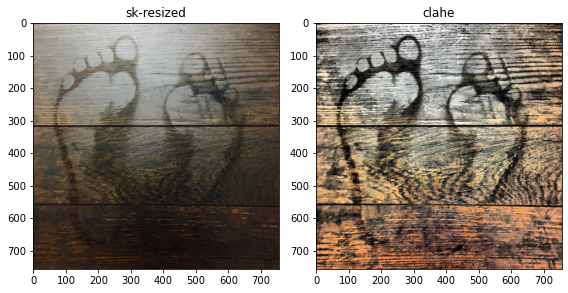

In [9]:
from skimage.exposure import equalize_adapthist as clahe

myimg_clahe = clahe(myimg_resized, kernel_size=100, clip_limit=0.2, nbins=50)
add_note(myimg_clahe)

multiplot((myimg_resized, myimg_clahe), ('sk-resized', 'clahe'), nrow=1, ncol=2)

## Denoise
Denoising is done to remove unwanted noise from image to analyze it in better form. It refers to one of the major pre-processing steps.

I use wavelet approach. A wavelet denoising filter relies on the wavelet representation of the image. I did not see obvious improvement for this picture using estimated sigma value. The resulted images have values above 1 and will be clipped. See [skimage Wavelet denoising ](https://scikit-image.org/docs/stable/auto_examples/filters/plot_denoise_wavelet.html) for more information.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


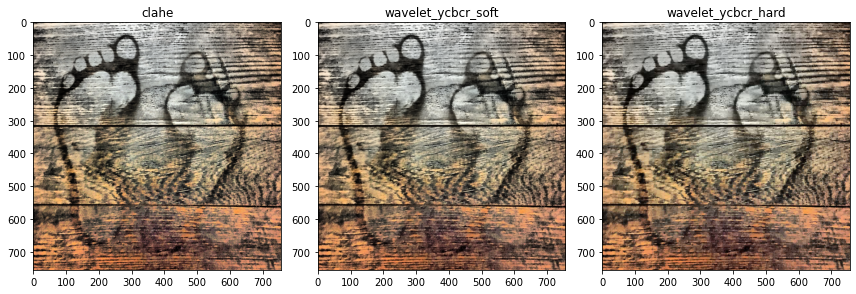

In [10]:
from skimage.restoration import denoise_tv_chambolle, denoise_bilateral, denoise_wavelet, estimate_sigma

s = estimate_sigma(myimg_clahe, multichannel=True, average_sigmas=True)

myimg_wv_ycbcr_soft = denoise_wavelet(myimg_clahe, multichannel=True, method='BayesShrink',
                                 mode='soft', sigma=s,
                                 convert2ycbcr=True, rescale_sigma=True)
myimg_wv_ycbcr_hard = denoise_wavelet(myimg_clahe, multichannel=True, method='VisuShrink',
                                 mode='hard', sigma=s,
                                 convert2ycbcr=True, rescale_sigma=True)
#myimg_tv1 = denoise_tv_chambolle(noisy, weight=0.1, multichannel=True)
#myimg_tv2 = denoise_tv_chambolle(noisy, weight=0.5, multichannel=True)

#myimg_bi1 = denoise_bilateral(original, sigma_color=0.05, sigma_spatial=15, multichannel=True)
#myimg_bi2 = denoise_bilateral(original, sigma_color=0.1, sigma_spatial=0.03,multichannel=True)

multiplot((myimg_clahe, myimg_wv_ycbcr_soft, myimg_wv_ycbcr_hard), #myimg_wv_ycbcr_soft, myimg_wv_ycbcr_hard), 
          ('clahe','wavelet_ycbcr_soft', 'wavelet_ycbcr_hard'), nrow=1, ncol=3, h=4, w=12)

## Edge detection

Segmentation is to group pixels in an image such that pixels with the same group or segment are similar in certain ways. It helps locate objects and boundaries in images and we can focus on segments of interest. 

The simple way of segmentation is thresholding based on the histogram of gray values. The other ways could be edge-based (e.g., canny) and region-based. The comparison is expalined here in [skimage documentation](https://scikit-image.org/docs/stable/auto_examples/applications/plot_coins_segmentation.html) and [geeksforgeeks](https://www.geeksforgeeks.org/region-and-edge-based-segmentaion/).

Here I am interested in edge detection. The vertical edges look cool to me.

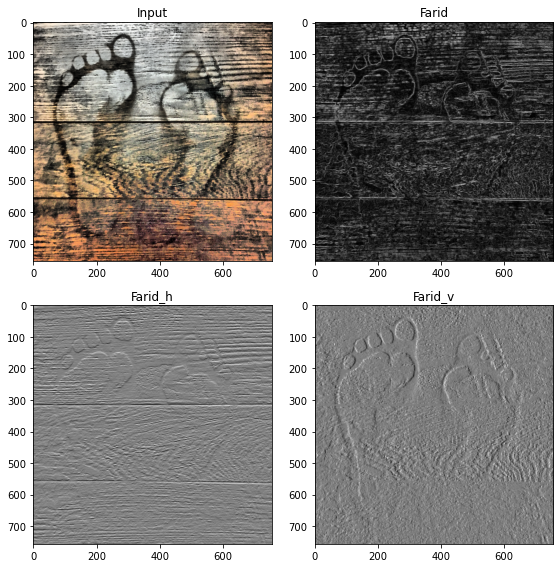

In [11]:
from skimage import filters
from skimage.color import rgb2gray as r2g
#from skimage.feature import canny
#myimg_roberts = filters.roberts(r2g(myimg_clahe))
#myimg_sobel = filters.sobel(r2g(myimg_clahe))
#myimg_sobel_h = filters.sobel_h(r2g(myimg_clahe))
#myimg_sobel_v = filters.sobel_v(r2g(myimg_clahe))
#myimg_prewitt_v = filters.prewitt_v(r2g(myimg_clahe))
#myimg_scharr_v = filters.scharr_v(r2g(myimg_clahe))
myimg_farid = filters.farid(r2g(myimg_wv_ycbcr_soft))
myimg_farid_h = filters.farid_h(r2g(myimg_wv_ycbcr_soft))
myimg_farid_v = filters.farid_v(r2g(myimg_wv_ycbcr_soft))

multiplot((myimg_clahe, myimg_farid, myimg_farid_h, myimg_farid_v), ('Input', 'Farid', 'Farid_h', 'Farid_v'), 
          nrow=2, ncol=2)

## Blending

To merge two images, they must have same sizes or dimensions. I have adapted from this code [link](https://itecnote.com/tecnote/python-resize-image-with-skimage-library-without-stretching/) for resize images without streching (but with padding).


In [12]:
def resize_padded(img, new_shape, fill_cval=None, order=1):
    #adapted from the ref (see the above link); allowing input of color image and more...
    import numpy as np
    from skimage.transform import resize
    if fill_cval is None:
      fill_cval = np.repeat(np.int64(np.max(img)/3), 3)
    fill_cval = np.array(fill_cval)
    if len(img.shape) == 2:
      dm = 1
      fill_cval = fill_cval[:1]
      new_img3 = np.empty(new_shape, dtype='float64')
    else:
      dm = 3
      new_img3 = np.empty(np.append(new_shape, 3), dtype='float64')  

    ratio = np.min([n / i for n, i in zip(new_shape[:2], img.shape[:2])])
    interm_shape = np.rint([s * ratio for s in img.shape[:2]]).astype(np.int64)
    
    ##idx = np.argmax(interm_shape)
    ##interm_shape[idx] = new_shape[idx]
    #new_img3 = np.empty(np.append(new_shape,3), dtype='float64')

    for i in range(dm):
      if dm==1:
        interm_img = resize(img, interm_shape, order=order, cval=fill_cval[i])
      else:
        interm_img = resize(img[:,:,i], interm_shape, order=order)#, cval=fill_cval[i])
      new_img = np.empty(new_shape, dtype=interm_img.dtype)
      new_img.fill(fill_cval[i])

      diffs = [(n - s) for n, s in zip(new_shape, interm_shape)]

      tops = np.floor(np.divide(diffs, 2))
      bots = -(diffs-tops)

      pads = np.stack((tops, bots), axis=1)
      pads = pads.astype('int64')

      new_img[tuple([slice(p1, p2, None) if (p1!=0 and p2!=0) else slice(None, None, None) for p1, p2 in pads])] = interm_img

      if dm==1:
        new_img3 = new_img
      else:
        new_img3[:,:,i] = new_img

    return new_img3

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


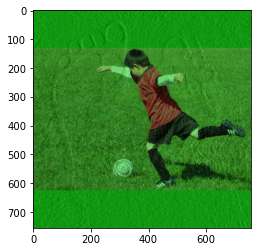

In [13]:
from skimage import io, color

myimg_fg = io.imread(myfg_file)
myimg_bg = myimg_farid_v

myimg_fg = resize_padded(myimg_fg, myimg_bg.shape, fill_cval=[0.15, .7, .15], order=1)

myimg_comb = myimg_fg
myimg_fg[:,:,0] = 0.45* myimg_fg[:,:,0] + 1*myimg_bg
myimg_fg[:,:,1] = 0.85* myimg_fg[:,:,1] + 1*myimg_bg
myimg_fg[:,:,2] = 0.45* myimg_fg[:,:,2] + 1*myimg_bg
plt.imshow(myimg_comb)
plt.show()

#### TO BE CONTINUED